In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('./labels.csv')
df

,id,gender,age_group,race,body_shape
0,00001_00,woman,twenties,white,average
1,06679_00,woman,twenties,white,average
2,00006_00,woman,twenties,white,slim
3,06749_00,woman,twenties,white,slim
4,07212_00,woman,twenties,white,slim
...,...,...,...,...,...
13681,12193_00,woman,twenties,white,slim
13682,12690_00,woman,thirties,white,maternity
13683,14152_00,woman,twenties,white,slim
13684,14243_00,woman,thirties,white,full-figured


In [6]:
for col in df.columns:
    print(f'unique values for:{col}')
    print(df[col].unique())
    print('-'*30)

unique values for:id
['00001_00' '06679_00' '00006_00' ... '14152_00' '14243_00' '14381_00']
------------------------------
unique values for:gender
['woman' 'man']
------------------------------
unique values for:age_group
['twenties' 'thirties' 'forties' 'senior' 'unknown']
------------------------------
unique values for:race
['white' 'brunette' 'black' 'asian' 'indian' 'beunette' 'brunettes'
 'unknown']
------------------------------
unique values for:body_shape
['average' 'slim' 'maternity' 'full-figured' 'plus-size' 'full-figures'
 'unknown']
------------------------------


In [7]:
corrections = {
    'gender': {
        'woman.': 'woman',
    },
    'age_group': {
        'thorties': 'thirties',
        'tthirties': 'thirties',
        'therties': 'thirties',
        'twnetis': 'twenties',
        'twwenties': 'twenties',
        'thorties': 'thirties'
    },
    'race': {
        'beunette': 'brunette',
        'brunettes': 'brunette',
        'white4': 'white'
    },
    'body_shape': {
        'full-figures': 'full-figured'
    }
}


In [8]:
for col, mapping in corrections.items():
    df[col]=df[col].replace(mapping)


In [9]:
df

,id,gender,age_group,race,body_shape
0,00001_00,woman,twenties,white,average
1,06679_00,woman,twenties,white,average
2,00006_00,woman,twenties,white,slim
3,06749_00,woman,twenties,white,slim
4,07212_00,woman,twenties,white,slim
...,...,...,...,...,...
13681,12193_00,woman,twenties,white,slim
13682,12690_00,woman,thirties,white,maternity
13683,14152_00,woman,twenties,white,slim
13684,14243_00,woman,thirties,white,full-figured


In [10]:
for col in df.columns:
    print(f'unique values for:{col}')
    print(df[col].unique())
    print('-'*30)

unique values for:id
['00001_00' '06679_00' '00006_00' ... '14152_00' '14243_00' '14381_00']
------------------------------
unique values for:gender
['woman' 'man']
------------------------------
unique values for:age_group
['twenties' 'thirties' 'forties' 'senior' 'unknown']
------------------------------
unique values for:race
['white' 'brunette' 'black' 'asian' 'indian' 'unknown']
------------------------------
unique values for:body_shape
['average' 'slim' 'maternity' 'full-figured' 'plus-size' 'unknown']
------------------------------


In [11]:
df.to_csv('labels.csv', index=False)

ImportError: attempted relative import with no known parent package

In [8]:
df[df['age_group']=='unknown']

,id,gender,age_group,race,body_shape
13644,14541_00,man,unknown,unknown,unknown


In [9]:
df[df['race']=='unknown']

,id,gender,age_group,race,body_shape
13644,14541_00,man,unknown,unknown,unknown


In [10]:
df[df['body_shape']=='unknown']

,id,gender,age_group,race,body_shape
13187,05760_00,woman,twenties,asian,unknown
13644,14541_00,man,unknown,unknown,unknown
13685,14381_00,man,thirties,brunette,unknown


In [11]:
df.loc[df['id']=='05760_00', ['race', 'body_shape']] = ['brunette', 'slim']

In [12]:
df[df['id']=='05760_00']

,id,gender,age_group,race,body_shape
13187,05760_00,woman,twenties,brunette,slim


In [13]:
df.shape[0]

13686

In [14]:
df[df.duplicated(keep=False)]

,id,gender,age_group,race,body_shape
6871,01270_00,woman,twenties,brunette,slim
7323,00081_00,woman,thirties,black,slim
7324,00121_00,woman,thirties,black,slim
8918,00930_00,woman,twenties,black,slim
11241,00081_00,woman,thirties,black,slim
11247,00121_00,woman,thirties,black,slim
11346,00930_00,woman,twenties,black,slim
11385,01270_00,woman,twenties,brunette,slim


In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.shape[0]

13682

In [17]:
df[df.duplicated(subset=['id'], keep=False)]

,id,gender,age_group,race,body_shape
7036,01212_00,woman,thirties,black,slim
9489,01040_00,woman,twenties,white,average
9576,01229_00,woman,thirties,brunette,slim
11360,01040_00,woman,thirties,brunette,maternity
11372,01212_00,woman,twenties,white,slim
11374,01229_00,woman,twenties,brunette,slim


In [18]:
df = df.drop_duplicates(subset=['id'], keep='first')

In [19]:
df[df.duplicated(subset=['id'], keep=False)]

,id,gender,age_group,race,body_shape


In [20]:
df.shape[0]

13679

In [21]:
df.to_csv('preprocessed.csv', index=False)

In [22]:
df = pd.read_csv('./preprocessed.csv')

In [23]:
man_df = df[df['gender']=='man']

In [24]:
man_df

,id,gender,age_group,race,body_shape
10825,12258_00,man,thirties,white,average
10826,12367_00,man,thirties,white,average
11245,00120_00,man,thirties,white,average
11249,00153_00,man,twenties,black,average
11308,00669_00,man,thirties,white,average
11708,05752_00,man,thirties,white,average
12989,01795_00,man,twenties,white,average
13021,02515_00,man,thirties,white,average
13023,02545_00,man,thirties,brunette,average
13063,03334_00,man,thirties,brunette,average


In [25]:
man_df.shape[0]

20

In [26]:
woman_df = df[df['gender']=='woman']
woman_df

,id,gender,age_group,race,body_shape
0,00001_00,woman,twenties,white,average
1,06679_00,woman,twenties,white,average
2,00006_00,woman,twenties,white,slim
3,06749_00,woman,twenties,white,slim
4,07212_00,woman,twenties,white,slim
...,...,...,...,...,...
13673,12133_00,woman,twenties,white,slim
13674,12193_00,woman,twenties,white,slim
13675,12690_00,woman,thirties,white,maternity
13676,14152_00,woman,twenties,white,slim


In [27]:
woman_df.shape[0]

13659

In [28]:
woman_df

,id,gender,age_group,race,body_shape
0,00001_00,woman,twenties,white,average
1,06679_00,woman,twenties,white,average
2,00006_00,woman,twenties,white,slim
3,06749_00,woman,twenties,white,slim
4,07212_00,woman,twenties,white,slim
...,...,...,...,...,...
13673,12133_00,woman,twenties,white,slim
13674,12193_00,woman,twenties,white,slim
13675,12690_00,woman,thirties,white,maternity
13676,14152_00,woman,twenties,white,slim


In [29]:
woman_df.to_csv('./preprocessed.csv', index=False)

In [30]:
df = pd.read_csv('./preprocessed.csv')

In [31]:
ids_in_df = set(df['id'])


In [32]:
import os
duplicated_imgs = [img.split('.')[0] for img in os.listdir('../duplicated_images/')]
duplicated_ids = set(duplicated_imgs)

In [33]:
df = df.drop(df[df['id'].isin(duplicated_imgs)].index)

In [34]:
df

,id,gender,age_group,race,body_shape
0,00001_00,woman,twenties,white,average
1,06679_00,woman,twenties,white,average
2,00006_00,woman,twenties,white,slim
3,06749_00,woman,twenties,white,slim
4,07212_00,woman,twenties,white,slim
...,...,...,...,...,...
13654,12133_00,woman,twenties,white,slim
13655,12193_00,woman,twenties,white,slim
13656,12690_00,woman,thirties,white,maternity
13657,14152_00,woman,twenties,white,slim


In [35]:
missing_ids = duplicated_ids - ids_in_df

print("IDs des images dupliquées non trouvées dans le DataFrame :", missing_ids)

IDs des images dupliquées non trouvées dans le DataFrame : set()


In [36]:
df.to_csv('./preprocessed.csv', index=False)

In [37]:
import pandas as pd 
import os 


In [38]:
images_folder = '../images/'
df = pd.read_csv('./preprocessed_2.csv')

In [39]:
valid_ids = set(df['id'].astype(str))


In [40]:
for filename in os.listdir(images_folder):
    if filename.endswith(".jpg"):
        image_id = os.path.splitext(filename)[0]  
        if image_id not in valid_ids:
            file_path = os.path.join(images_folder, filename)
            os.remove(file_path)
            print(f"Supprimé : {filename}")

Supprimé : 00058_00.jpg
Supprimé : 00120_00.jpg
Supprimé : 00153_00.jpg
Supprimé : 00588_00.jpg
Supprimé : 00669_00.jpg
Supprimé : 00756_00.jpg
Supprimé : 00778_00.jpg
Supprimé : 01008_00.jpg
Supprimé : 01260_00.jpg
Supprimé : 01261_00.jpg
Supprimé : 01361_00.jpg
Supprimé : 01680_00.jpg
Supprimé : 01795_00.jpg
Supprimé : 01870_00.jpg
Supprimé : 01932_00.jpg
Supprimé : 01947_00.jpg
Supprimé : 02016_00.jpg
Supprimé : 02515_00.jpg
Supprimé : 02520_00.jpg
Supprimé : 02521_00.jpg
Supprimé : 02545_00.jpg
Supprimé : 02772_00.jpg
Supprimé : 02773_00.jpg
Supprimé : 03334_00.jpg
Supprimé : 03360_00.jpg
Supprimé : 03444_00.jpg
Supprimé : 03454_00.jpg
Supprimé : 03528_00.jpg
Supprimé : 03696_00.jpg
Supprimé : 03806_00.jpg
Supprimé : 03865_00.jpg
Supprimé : 04032_00.jpg
Supprimé : 04033_00.jpg
Supprimé : 04200_00.jpg
Supprimé : 04264_00.jpg
Supprimé : 04452_00.jpg
Supprimé : 04788_00.jpg
Supprimé : 05310_00.jpg
Supprimé : 05520_00.jpg
Supprimé : 05594_00.jpg
Supprimé : 05752_00.jpg
Supprimé : 05773

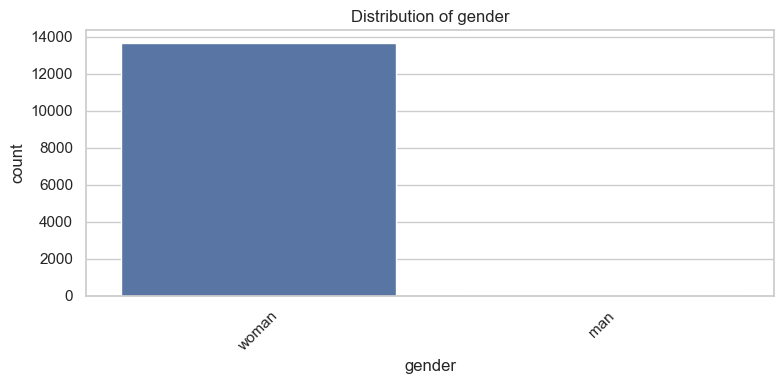

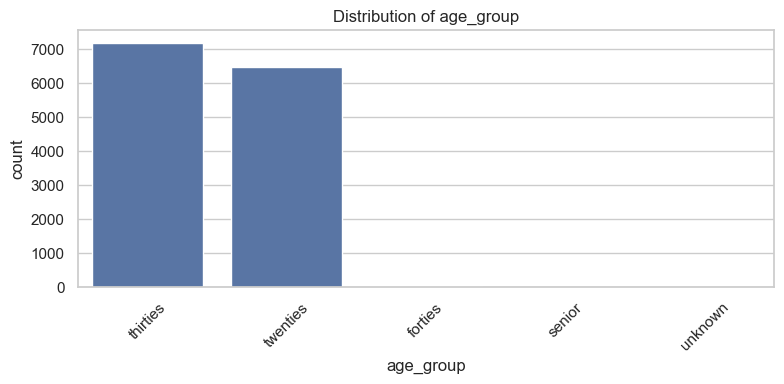

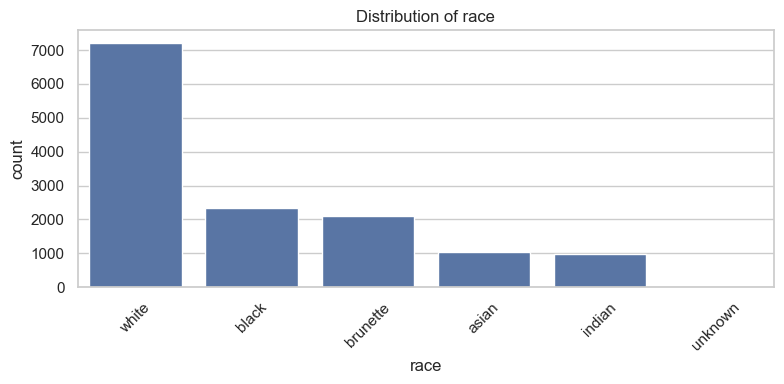

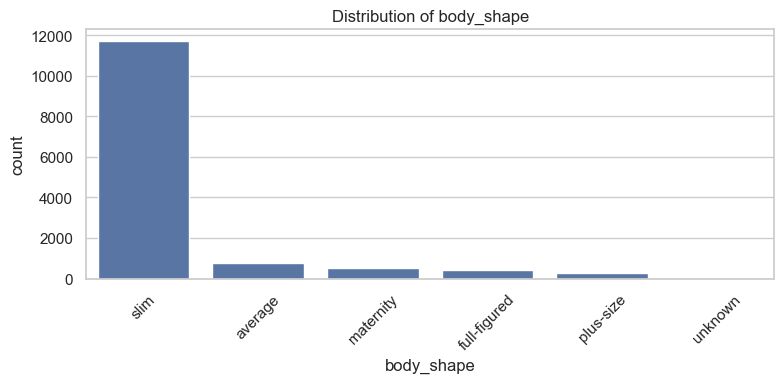

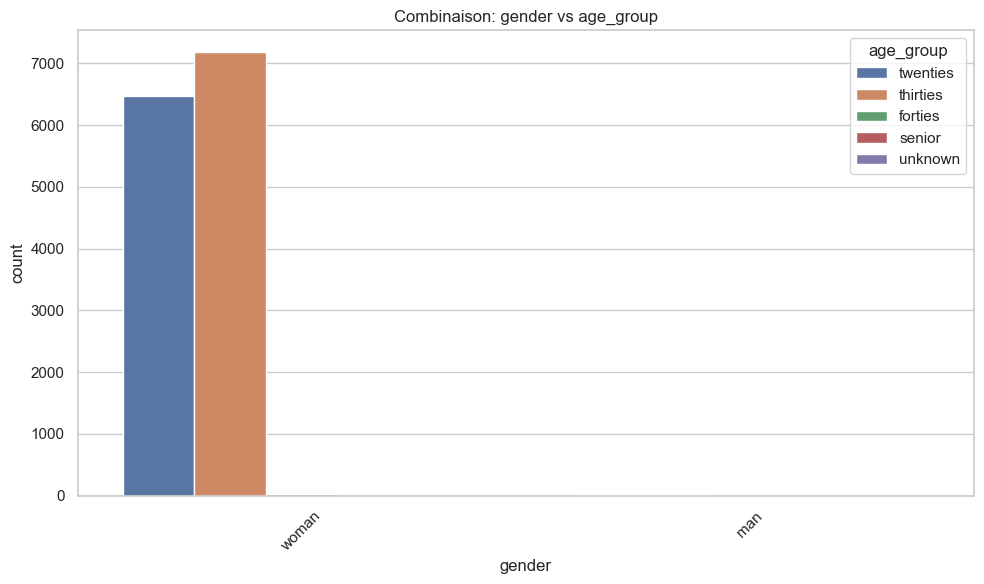

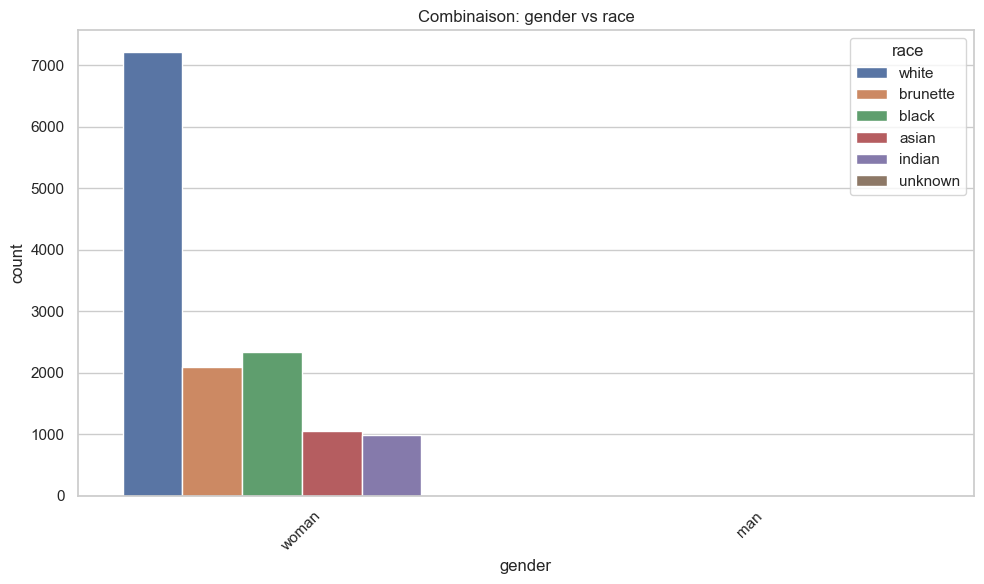

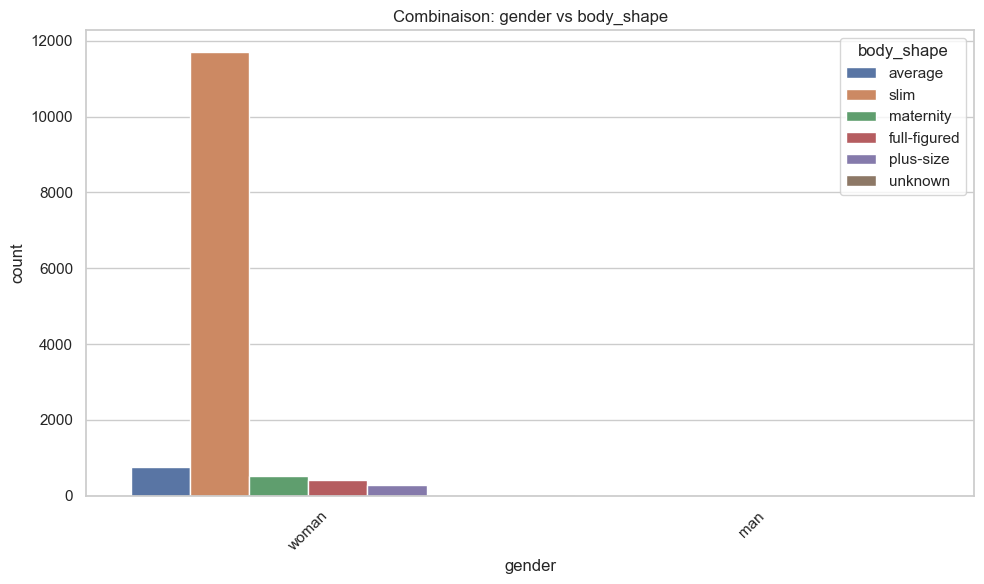

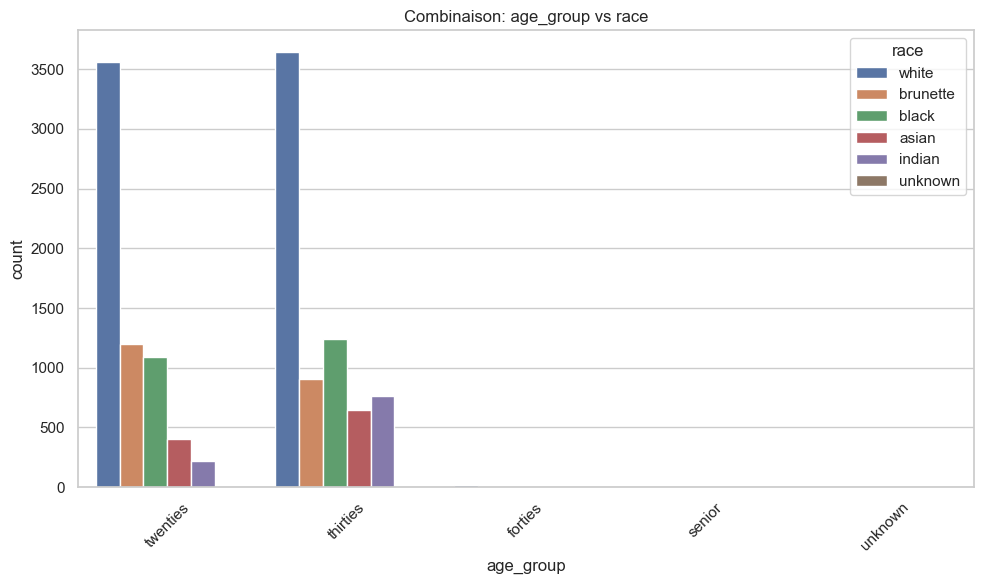

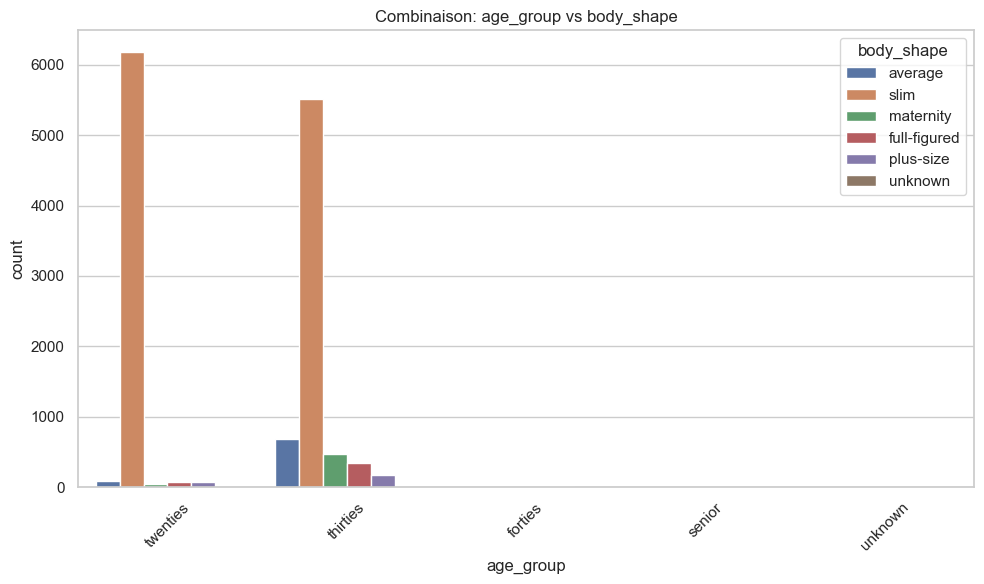

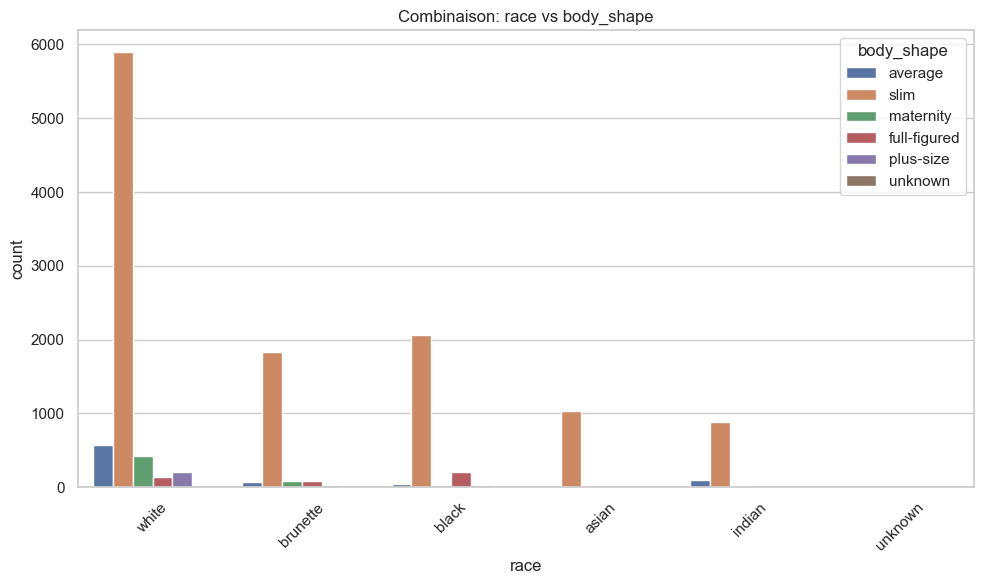

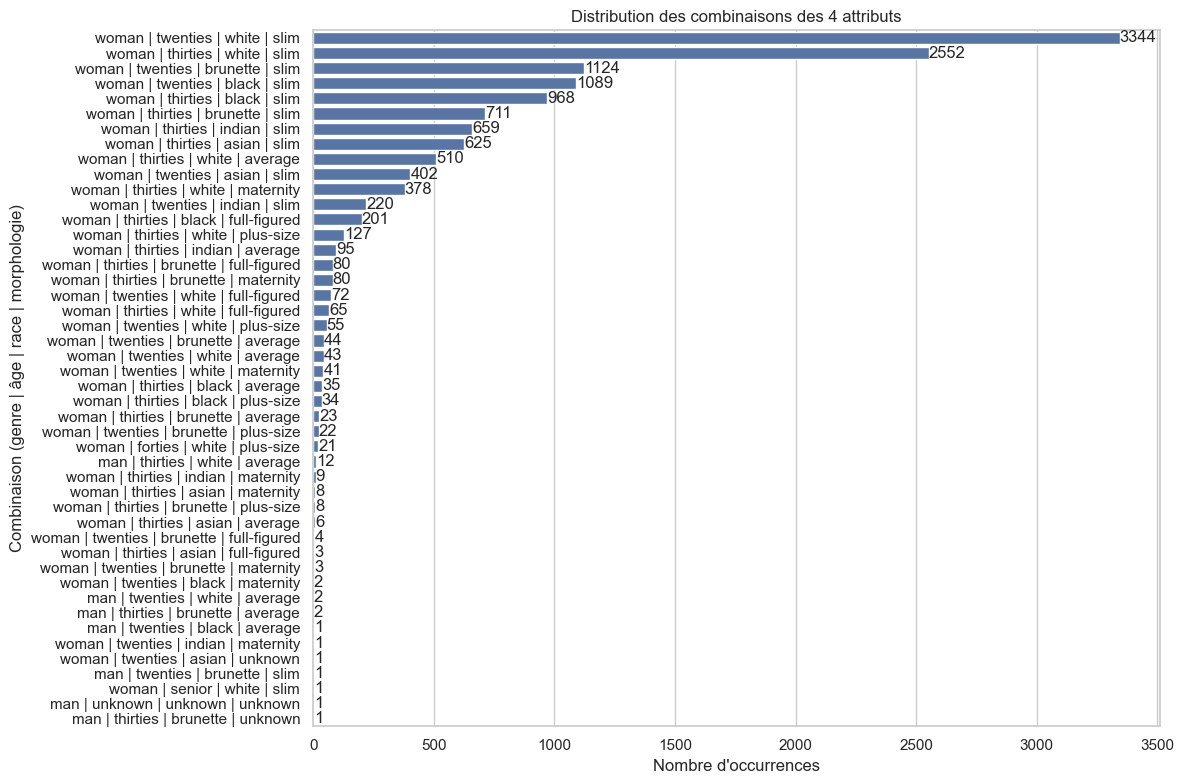

In [17]:
import sys
sys.path.append('..')  # ajoute le dossier parent au path
from utils.plot import analyze_demographic_distribution
df = pd.read_csv('./labels.csv')
analyze_demographic_distribution(df)